# Import Library

In [ ]:
import praw
import asyncpraw
import pandas as pd
import numpy as np
import re
import base64
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Collect data from Reddit

In [ ]:
# set API สำหรับเก็บข้อมูล
reddit = praw.Reddit(
                     client_id='my client id', 
                     client_secret='my client secret', 
                     user_agent='my user agent',
                     username='my username',
                     password='my password')

In [ ]:
# เริ่มทำการเก็บข้อมูลจาก raddit Apex Legends
hot_posts = reddit.subreddit('apexlegends').hot(limit=None)
data = []
for post in hot_posts:
  data.append({'ID_post' : str(post.id),
                'Title_post' : str(post.title),
                'Post_url' : str(post.url),
                'text' : str(post.selftext),
                'type_post' : 'post'
                })
  comments = post.comments.list()
  for comment in comments:
    if (isinstance(comment,praw.models.reddit.more.MoreComments)):
      continue
    data.append({'ID_post' : str(post.id),
                'Title_post' : str(post.title),
                'ID_comment' : str(comment.id),
                'Post_url' : str('https://www.reddit.com'+comment.permalink),
                'text' : str(comment.body),
                'type_post' : 'comment'
                })

In [ ]:
# เช็ค Data ที่เก็บได้มา
Data_Frame_reddit = pd.DataFrame(data)
Data_Frame_reddit

,ID_post,Title_post,Post_url,text,type_post,ID_comment
0,mmzbkv,Apex Legends War Games Event Trailer,https://twitter.com/playapex/status/1380174042...,,post,NaN
1,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,More details on the official page [here](https...,comment,gtugkj0
2,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Are they really pushing lazy recolors lol reco...,comment,gtwiynd
3,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Yes. 3 hot zones. Now I have 3 times the chanc...,comment,gtw21ks
4,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Details from the official page for anyone who ...,comment,gtuh5ou
...,...,...,...,...,...,...
15899,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Any other legend you have a chance to fight ba...,comment,gu61me3
15900,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,> what should I have done differently to give ...,comment,gu666mr
15901,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,"I'm not insanely good, but I can hit a horizon...",comment,gu64d95
15902,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Makes me sad as a fellow path main that Horizo...,comment,gu625ul


In [ ]:
pd.unique(Data_Frame_reddit['Post_url']).size # เช็คว่ามี record ซ้ำไหม

15904

In [ ]:
Data_Frame_reddit.to_excel('APEX_Data_Frame_reddit.xlsx') # Export Data ออกมาเก็บไว้

# Collect data from Twitter

In [ ]:
# set to token Twitter API
consumer_api_key = "API Key"
consumer_api_secret = "API secret"
key_secret = '{}:{}'.format(consumer_api_key, consumer_api_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)
auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}
auth_data = { 'grant_type': 'client_credentials'}
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)

In [ ]:
# function สำหรับเช็คตอนดึงข้อมูลมาว่าซ้ำไหม เป็นการเช็คคราวๆ
def check_data(data,result_data):
  tmp = pd.DataFrame(data)
  count = 0
  for row in result_data:
    if row['id_str'] in list(tmp['id_str']):
      count += 1
      continue
    else:
      data.append(row)
  return (count,data)

รอบที่ 1

In [ ]:
access_token = auth_resp.json()['access_token']
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

search_params = {
    'q': ['APEX','APEXLEGEND','APEXLEGENDS','apex','apexlegend','apexlegends'],
    'result_type': 'mixed',
    'count': 100  }
search_url = '{}1.1/search/tweets.json'.format(base_url)

In [ ]:
#กระบวนการเก็บข้อมูล
data = []

for i in range(100):
  search_resp = requests.get(search_url, headers=search_headers, params=search_params)
  result_data = search_resp.json()
  num_result = len(result_data['statuses'])
  print("num of result :",num_result)
  print('count :',i+1,end=' ')
  if len(data) == 0:
    data = result_data['statuses']
    row_de = 0

  else:
    row_de,data = check_data(data,result_data['statuses'])
  print("num of row delete :",str(row_de))
  search_params['max_id'] = data[-1]['id']

  if (num_result == row_de):
    break
  time.sleep(2)

pd.DataFrame(data)

num of result : 100
count : 1 num of row delete : 0
num of result : 100
count : 2 num of row delete : 1
num of result : 100
count : 3 num of row delete : 1
num of result : 100
count : 4 num of row delete : 1
num of result : 100
count : 5 num of row delete : 1
num of result : 100
count : 6 num of row delete : 1
num of result : 100
count : 7 num of row delete : 1
num of result : 100
count : 8 num of row delete : 1
num of result : 100
count : 9 num of row delete : 1
num of result : 100
count : 10 num of row delete : 1
num of result : 100
count : 11 num of row delete : 1
num of result : 100
count : 12 num of row delete : 1
num of result : 100
count : 13 num of row delete : 1
num of result : 100
count : 14 num of row delete : 1
num of result : 100
count : 15 num of row delete : 1
num of result : 100
count : 16 num of row delete : 1
num of result : 100
count : 17 num of row delete : 1
num of result : 100
count : 18 num of row delete : 1
num of result : 100
count : 19 num of row delete : 1
nu

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 02:05:46 +0000 2021,1381790685557366786,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,None,NaN,None,None,"{'id': 7517222, 'id_str': '7517222', 'name': '...",None,None,None,None,False,292,1738,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 10:36:07 +0000 2021,1381556729880584193,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 881974290656178176, 'id_str': '88197429...",None,None,None,None,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 02:47:00 +0000 2021,1381801062747807745,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,None,NaN,None,None,"{'id': 15290441, 'id_str': '15290441', 'name':...",None,None,None,None,False,345,1469,False,False,False,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,Tue Apr 13 20:29:46 +0000 2021,1382068515042066439,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 970926876163125249, 'id_str': '97092687...",None,None,None,None,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,Tue Apr 13 20:29:45 +0000 2021,1382068512307388416,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 929029028618518528, 'id_str': '92902902...",None,None,None,None,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,Tue Apr 13 17:40:38 +0000 2021,1382025953199591426,1382025953199591426,@APEX_NURI 혹 네네!!!!! 환영입니다요!!! 디엠으로 디코 링크 드릴게요...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",1.382026e+18,1382025776212561920,1.057162e+18,1057161719921831936,APEX_NURI,"{'id': 1181774767440842752, 'id_str': '1181774...",None,None,None,None,False,0,0,False,False,NaN,ko,NaN,NaN,NaN,NaN,NaN
9897,Tue Apr 13 17:40:36 +0000 2021,1382025945997971460,1382025945997971460,APEX以外に情熱を注いでやっている事がファッションくらいしかないので、ロジックでオシャレに...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 2527933044, 'id_str': '2527933044', 'na...",None,None,None,None,False,0,1,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
9898,Tue Apr 13 17:40:36 +0000 2021,1382025942004994049,1382025942004994049,@luvrc_Yule 오키 글루 걸게용!,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",1.382026e+18,1382025879887380481,1.270753e+18,12707

In [ ]:
data_twitter = pd.DataFrame(data)

In [ ]:
pd.unique(data_twitter['id']).size # เช็คว่ามี row ซ้ำไหม

9901

In [ ]:
data_twitter.to_excel('APEX_Data_Frame_twitter.xlsx') # Export Data ออกมาเก็บไว้

รอบที่ 2

In [ ]:
#กระบวนการเก็บข้อมูล
data = []

# while True:
for i in range(100):
  search_resp = requests.get(search_url, headers=search_headers, params=search_params)
  result_data = search_resp.json()
  num_result = len(result_data['statuses'])
  print("num of result :",num_result)
  print('count :',i+1,end=' ')
  if len(data) == 0:
    data = result_data['statuses']
    row_de = 0

  else:
    row_de,data = check_data(data,result_data['statuses'])
  print("num of row delete :",str(row_de))
  search_params['max_id'] = data[-1]['id']

  if (num_result == row_de):
    break
  time.sleep(2)

pd.DataFrame(data)

num of result : 100
count : 1 num of row delete : 0
num of result : 100
count : 2 num of row delete : 1
num of result : 100
count : 3 num of row delete : 1
num of result : 100
count : 4 num of row delete : 1
num of result : 100
count : 5 num of row delete : 1
num of result : 100
count : 6 num of row delete : 1
num of result : 100
count : 7 num of row delete : 1
num of result : 100
count : 8 num of row delete : 1
num of result : 100
count : 9 num of row delete : 1
num of result : 100
count : 10 num of row delete : 1
num of result : 100
count : 11 num of row delete : 1
num of result : 100
count : 12 num of row delete : 1
num of result : 100
count : 13 num of row delete : 1
num of result : 100
count : 14 num of row delete : 1
num of result : 100
count : 15 num of row delete : 1
num of result : 100
count : 16 num of row delete : 1
num of result : 100
count : 17 num of row delete : 1
num of result : 100
count : 18 num of row delete : 1
num of result : 100
count : 19 num of row delete : 1
nu

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 17:40:34 +0000 2021,1382025934132318210,1382025934132318210,APEX Scoring System: Score and track audience ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,NaN,None,None,"{'id': 928490268, 'id_str': '928490268', 'name...",None,None,None,None,False,0,0,False,False,False,fr,NaN,NaN,NaN,NaN,NaN
1,Tue Apr 13 17:40:33 +0000 2021,1382025932324544513,1382025932324544513,ウォーゲーム\nクソゲーやん。\n\n#APEX,False,"{'hashtags': [{'text': 'APEX', 'indices': [16,...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1363165613363851265, 'id_str': '1363165...",None,None,None,None,False,0,2,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 17:40:33 +0000 2021,1382025932270051335,1382025932270051335,銀河くん、虎ちゃん、ありがとう！\nマジでふざけながらちゃんぽん取りまくってて笑いが止まりま...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1375454044144066560, 'id_str': '1375454...",None,None,None,None,False,0,1,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
3,Tue Apr 13 17:40:33 +0000 2021,1382025931695427585,1382025931695427585,apexウォーゲームSwitchもきてる〜！！！やる1人でwwwwwwwむりしぬ,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1349728936003948548, 'id_str': '1349728...",None,None,None,None,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
4,Tue Apr 13 17:40:32 +0000 2021,1382025929195712516,1382025929195712516,RT @MechaMacGyver: Turns out I'm a fake fight ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 3407644191, 'id_str': '3407644191', 'na...",None,None,None,None,False,28,0,False,False,NaN,en,{'created_at': 'Mon Apr 12 22:31:03 +0000 2021...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,Tue Apr 13 15:59:51 +0000 2021,1382000589601525761,1382000589601525761,✨Apex代行✨\n\n【PC・PS4】両方対応‼️\n\n今案件少ないのでなるべく希望の金...,True,"{'hashtags': [{'text': 'Apex代行pc', 'indices': ...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1371809591810387969, 'id_str': '1371809...",None,None,None,None,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
9897,Tue Apr 13 15:59:50 +0000 2021,1382000587147898883,1382000587147898883,APEX 20210413 カジュアルダブハンチャレンジ会場 https://t.co/U4...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1212258493954002945, 'id_str': '1212258...",None,None,None,None,False,0,1,False,False,False,ja,NaN,NaN,NaN,NaN,NaN
9898,Tue Apr 13 15:59:49 +0000 2021,1382000582622253056,1382000582622253056,APEXゴールド弱すぎてPCの方プラチナ行けた,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 838426278948589568, 'id_str': '83842627...",None,None,None,None,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
9899,Tue Apr 13 15:59:49 +0000 

In [ ]:
data_twitter2 = pd.DataFrame(data)

In [ ]:
pd.unique(data_twitter2['id']).size

9901

In [ ]:
data_twitter2.to_excel('APEX_Data_Frame_twitter2.xlsx') # Export Data ออกมาเก็บไว้

In [ ]:
merge_data_tw = data_twitter.merge(data_twitter2,how = 'outer')
merge_data_tw

In [ ]:
data_twitter['id'].iloc[-1]

1382025934132318210

In [ ]:
print(search_params['max_id'] == data_twitter['id'].iloc[-1])

True


รอบที่ 3

In [ ]:
access_token = auth_resp.json()['access_token']
search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}

search_params = {
    'q': ['PlayApex','APEX','APEXLEGEND','APEXLEGENDS','apex','apexlegend','apexlegends'],
    'result_type': 'mixed',
    'count': 100,
    }
search_url = '{}1.1/search/tweets.json'.format(base_url)

In [ ]:
#กระบวนการเก็บข้อมูล
data = []

# while True:
for i in range(200):
  search_resp = requests.get(search_url, headers=search_headers, params=search_params)
  result_data = search_resp.json()
  num_result = len(result_data['statuses'])
  print("num of result :",num_result)
  print('count :',i+1,end=' ')
  if len(data) == 0:
    data = result_data['statuses']
    row_de = 0

  else:
    row_de,data = check_data(data,result_data['statuses'])
  print("num of row delete :",str(row_de))
  search_params['max_id'] = data[-1]['id']

  if (num_result == row_de):
    break
  time.sleep(2)

pd.DataFrame(data)

num of result : 100
count : 1 num of row delete : 0
num of result : 100
count : 2 num of row delete : 1
num of result : 100
count : 3 num of row delete : 1
num of result : 100
count : 4 num of row delete : 1
num of result : 100
count : 5 num of row delete : 1
num of result : 100
count : 6 num of row delete : 1
num of result : 100
count : 7 num of row delete : 1
num of result : 100
count : 8 num of row delete : 1
num of result : 100
count : 9 num of row delete : 1
num of result : 100
count : 10 num of row delete : 1
num of result : 100
count : 11 num of row delete : 1
num of result : 100
count : 12 num of row delete : 1
num of result : 100
count : 13 num of row delete : 1
num of result : 100
count : 14 num of row delete : 1
num of result : 100
count : 15 num of row delete : 1
num of result : 100
count : 16 num of row delete : 1
num of result : 100
count : 17 num of row delete : 1
num of result : 100
count : 18 num of row delete : 1
num of result : 100
count : 19 num of row delete : 1
nu

,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 17:00:33 +0000 2021,1382015863650390017,1382015863650390017,Shall we play a game? The War Games Event is n...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1382015852397129738, 'id_str...","{'result_type': 'popular', 'iso_language_code'...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,None,NaN,None,None,"{'id': 1048018930785083392, 'id_str': '1048018...",None,None,None,None,False,884,11116,False,False,False,en,NaN,NaN,NaN,NaN
1,Mon Apr 12 20:31:31 +0000 2021,1381706566986915840,1381706566986915840,A shock to the system. https://t.co/uvCABWA4oe,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1381706397910360066, 'id_str...","{'result_type': 'popular', 'iso_language_code'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.379503e+18,1379502645417664514,1.048019e+18,1048018930785083392,PlayApex,"{'id': 1048018930785083392, 'id_str': '1048018...",None,None,None,None,False,2221,12734,False,False,False,en,NaN,NaN,NaN,NaN
2,Wed Apr 14 00:07:01 +0000 2021,1382123188524515331,1382123188524515331,Hi! A bug with the Second Chance takeover in @...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'result_type': 'popular', 'iso_language_code'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 207936757, 'id_str': '207936757', 'name...",None,None,None,None,False,412,5425,False,False,NaN,en,NaN,NaN,NaN,NaN
3,Wed Apr 14 12:24:28 +0000 2021,1382308774405365760,1382308774405365760,"@RoarTitan @Respawn @PlayApex Snap, I just cha...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.382144e+18,1382144271818575875,1.221940e+18,1221940071789670400,RoarTitan,"{'id': 1281574078927777794, 'id_str': '1281574...",None,None,None,None,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,Wed Apr 14 12:24:13 +0000 2021,1382308709427245056,1382308709427245056,@Zetrym1 @PlayApex Same 😂😂,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.382131e+18,1382131184394772486,9.477105e+17,947710481514614784,Zetrym1,"{'id': 1125509802854109189, 'id_str': '1125509...",None,None,None,None,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,Mon Apr 12 20:51:40 +0000 2021,1381711638714314752,1381711638714314752,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1379838704747827202, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 827861538, 'id_str': '827861538', 'name...",None,None,None,None,False,2554,0,False,False,False,en,{'created_at': 'Wed Apr 07 17:15:00 +0000 2021...,NaN,NaN,NaN
19795,Mon Apr 12 20:51:37 +0000 2021,1381711628589228034,1381711628589228034,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.381711e+18,1381710729460453387,1.967344e+09,1967343859,ENXSwatbaker,"{'id': 1377341756795187207, 'id_str': '1377341...",None,None,None,None,False,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN
19796,Mon Apr 12 20:51:37 +0000 2021,1381711625103667202,138

In [ ]:
pd.DataFrame(data).to_excel('APEX_Data_Frame_twitter3.xlsx') # Export data มาเก็บไว้

# Clean Data Reddit

In [ ]:
data_reddit = pd.read_excel('APEX_Data_Frame_reddit.xlsx')
data_reddit

,Unnamed: 0,ID_post,Title_post,Post_url,text,type_post,ID_comment
0,0,mmzbkv,Apex Legends War Games Event Trailer,https://twitter.com/playapex/status/1380174042...,NaN,post,NaN
1,1,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,More details on the official page [here](https...,comment,gtugkj0
2,2,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Are they really pushing lazy recolors lol reco...,comment,gtwiynd
3,3,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Yes. 3 hot zones. Now I have 3 times the chanc...,comment,gtw21ks
4,4,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Details from the official page for anyone who ...,comment,gtuh5ou
...,...,...,...,...,...,...,...
15899,15899,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Any other legend you have a chance to fight ba...,comment,gu61me3
15900,15900,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,> what should I have done differently to give ...,comment,gu666mr
15901,15901,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,"I'm not insanely good, but I can hit a horizon...",comment,gu64d95
15902,15902,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Makes me sad as a fellow path main that Horizo...,comment,gu625ul


In [ ]:
data_reddit.duplicated().sum()

0

In [ ]:
data_reddit.columns

Index(['Unnamed: 0', 'ID_post', 'Title_post', 'Post_url', 'text', 'type_post',
       'ID_comment'],
      dtype='object')

In [ ]:
data_reddit.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
data_reddit.isnull().sum()

ID_post         0
Title_post      0
Post_url        0
text          590
type_post       0
ID_comment    883
dtype: int64

In [ ]:
tmp_check = data_reddit.iloc[data_reddit[data_reddit['text'].isnull()].index.tolist()]
tmp_check

,ID_post,Title_post,Post_url,text,type_post,ID_comment
0,mmzbkv,Apex Legends War Games Event Trailer,https://twitter.com/playapex/status/1380174042...,NaN,post,NaN
971,mp2kmd,The G7 sights would look so much better if the...,https://i.redd.it/s491czu6vms61.png,NaN,post,NaN
1460,mp09yn,"I don't know what the plan was, but it worked!",https://v.redd.it/v3h09ifv7ms61,NaN,post,NaN
1569,mp11tl,my editing sucks,https://v.redd.it/0ozkfctefms61,NaN,post,NaN
1801,mp3674,Hey guys when we getting Apex on the Wii?????,https://v.redd.it/kelubw0p1ns61,NaN,post,NaN
...,...,...,...,...,...,...
15824,momyjv,Who knows how to get buried Marvin’s items??,https://v.redd.it/1wu3v19d4is61,NaN,post,NaN
15827,moveh0,All my homies hate Horizon,https://youtu.be/n1RqWBJoec0,NaN,post,NaN
15848,moof2e,Been playing since launch and this is the clos...,https://i.redd.it/28oe4h4rqis61.jpg,NaN,post,NaN
15878,mofu3x,Could we get this for a QOL change? I realize ...,https://i.redd.it/wwhpt0jhnfs61.jpg,NaN,post,NaN


In [ ]:
pd.unique(tmp_check['type_post'])

array(['post'], dtype=object)

In [ ]:
tmp_check[['Title_post','Post_url']].head()

,Title_post,Post_url
0,Apex Legends War Games Event Trailer,https://twitter.com/playapex/status/1380174042...
971,The G7 sights would look so much better if the...,https://i.redd.it/s491czu6vms61.png
1460,"I don't know what the plan was, but it worked!",https://v.redd.it/v3h09ifv7ms61
1569,my editing sucks,https://v.redd.it/0ozkfctefms61
1801,Hey guys when we getting Apex on the Wii?????,https://v.redd.it/kelubw0p1ns61


In [ ]:
reddit_clean = data_reddit.drop(index=data_reddit[data_reddit['text'].isnull()].index.tolist())
reddit_clean

,ID_post,Title_post,Post_url,text,type_post,ID_comment
1,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,More details on the official page [here](https...,comment,gtugkj0
2,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Are they really pushing lazy recolors lol reco...,comment,gtwiynd
3,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Yes. 3 hot zones. Now I have 3 times the chanc...,comment,gtw21ks
4,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Details from the official page for anyone who ...,comment,gtuh5ou
5,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,I wonder what game breaking audio bugs we can ...,comment,gtugms9
...,...,...,...,...,...,...
15899,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Any other legend you have a chance to fight ba...,comment,gu61me3
15900,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,> what should I have done differently to give ...,comment,gu666mr
15901,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,"I'm not insanely good, but I can hit a horizon...",comment,gu64d95
15902,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Makes me sad as a fellow path main that Horizo...,comment,gu625ul


In [ ]:
reddit_clean.isnull().sum()

ID_post         0
Title_post      0
Post_url        0
text            0
type_post       0
ID_comment    293
dtype: int64

In [ ]:
reddit_clean.to_excel('Reddit_clean.xlsx')

In [ ]:
pd.unique(data_reddit['ID_post']).size

883

In [ ]:
pd.unique(data_reddit['type_post'].loc[data_reddit[data_reddit['ID_comment'].isnull()].index.tolist()])

array(['post'], dtype=object)

# Clean Data Twitter

In [ ]:
data_twitter1 = pd.read_excel('APEX_Data_Frame_twitter.xlsx')
data_twitter2 = pd.read_excel('APEX_Data_Frame_twitter2.xlsx')
data_twitter3 = pd.read_excel('APEX_Data_Frame_twitter3.xlsx')


In [ ]:
data_twitter1.head()

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,0,Tue Apr 13 02:05:46 +0000 2021,1381790685557367040,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 7517222, 'id_str': '7517222', 'name': '...",NaN,NaN,NaN,NaN,False,292,1738,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,1,Mon Apr 12 10:36:07 +0000 2021,1381556729880583936,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 881974290656178176, 'id_str': '88197429...",NaN,NaN,NaN,NaN,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,2,Tue Apr 13 02:47:00 +0000 2021,1381801062747808000,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 15290441, 'id_str': '15290441', 'name':...",NaN,NaN,NaN,NaN,False,345,1469,False,False,0.0,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,3,Tue Apr 13 20:29:46 +0000 2021,1382068515042065920,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 970926876163125249, 'id_str': '97092687...",NaN,NaN,NaN,NaN,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,4,Tue Apr 13 20:29:45 +0000 2021,1382068512307387904,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 929029028618518528, 'id_str': '92902902...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN


In [ ]:
drop_column = data_twitter1.columns[0]
drop_column

'Unnamed: 0'

In [ ]:
data_twitter1.drop(columns=drop_column,inplace=True)
data_twitter2.drop(columns=drop_column,inplace=True)
data_twitter3.drop(columns=drop_column,inplace=True)

In [ ]:
data_twitter3

,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 17:00:33 +0000 2021,1382015863650390016,1382015863650390017,Shall we play a game? The War Games Event is n...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1382015852397129738, 'id_str...","{'result_type': 'popular', 'iso_language_code'...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,NaN,NaN,NaN,NaN,"{'id': 1048018930785083392, 'id_str': '1048018...",NaN,NaN,NaN,NaN,False,884,11116,False,False,0.0,en,NaN,NaN,NaN,NaN
1,Mon Apr 12 20:31:31 +0000 2021,1381706566986916096,1381706566986915840,A shock to the system. https://t.co/uvCABWA4oe,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1381706397910360066, 'id_str...","{'result_type': 'popular', 'iso_language_code'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.379503e+18,1.379503e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1048018930785083392, 'id_str': '1048018...",NaN,NaN,NaN,NaN,False,2221,12734,False,False,0.0,en,NaN,NaN,NaN,NaN
2,Wed Apr 14 00:07:01 +0000 2021,1382123188524515072,1382123188524515331,Hi! A bug with the Second Chance takeover in @...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'result_type': 'popular', 'iso_language_code'...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 207936757, 'id_str': '207936757', 'name...",NaN,NaN,NaN,NaN,False,412,5425,False,False,NaN,en,NaN,NaN,NaN,NaN
3,Wed Apr 14 12:24:28 +0000 2021,1382308774405366016,1382308774405365760,"@RoarTitan @Respawn @PlayApex Snap, I just cha...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.382144e+18,1.382144e+18,1.221940e+18,1.221940e+18,RoarTitan,"{'id': 1281574078927777794, 'id_str': '1281574...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
4,Wed Apr 14 12:24:13 +0000 2021,1382308709427245056,1382308709427245056,@Zetrym1 @PlayApex Same 😂😂,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.382131e+18,1.382131e+18,9.477105e+17,9.477105e+17,Zetrym1,"{'id': 1125509802854109189, 'id_str': '1125509...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,Mon Apr 12 20:51:40 +0000 2021,1381711638714315008,1381711638714314752,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1379838704747827202, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 827861538, 'id_str': '827861538', 'name...",NaN,NaN,NaN,NaN,False,2554,0,False,False,0.0,en,{'created_at': 'Wed Apr 07 17:15:00 +0000 2021...,NaN,NaN,NaN
19795,Mon Apr 12 20:51:37 +0000 2021,1381711628589228032,1381711628589228034,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.381711e+18,1.381711e+18,1.967344e+09,1.967344e+09,ENXSwatbaker,"{'id': 1377341756795187207, 'id_str': '1377341...",NaN,NaN,NaN,NaN,False,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN
19796,Mon Apr 12 20:51:37 +0000 2021,1381711625103666944,1381711625103667202,@PlayApex https://t.co/Our2uevd8t,False,"{'hashtags': [], 'symbols': [],

In [ ]:
tmp1 = data_twitter1.merge(data_twitter2,how='outer')
tmp1

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 02:05:46 +0000 2021,1381790685557367040,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 7517222, 'id_str': '7517222', 'name': '...",NaN,NaN,NaN,NaN,False,292,1738,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 10:36:07 +0000 2021,1381556729880583936,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 881974290656178176, 'id_str': '88197429...",NaN,NaN,NaN,NaN,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 02:47:00 +0000 2021,1381801062747808000,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 15290441, 'id_str': '15290441', 'name':...",NaN,NaN,NaN,NaN,False,345,1469,False,False,0.0,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,Tue Apr 13 20:29:46 +0000 2021,1382068515042065920,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 970926876163125249, 'id_str': '97092687...",NaN,NaN,NaN,NaN,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,Tue Apr 13 20:29:45 +0000 2021,1382068512307387904,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 929029028618518528, 'id_str': '92902902...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,Tue Apr 13 15:59:51 +0000 2021,1382000589601526016,1382000589601525761,✨Apex代行✨\n\n【PC・PS4】両方対応‼️\n\n今案件少ないのでなるべく希望の金...,True,"{'hashtags': [{'text': 'Apex代行pc', 'indices': ...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 1371809591810387969, 'id_str': '1371809...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
19797,Tue Apr 13 15:59:50 +0000 2021,1382000587147898880,1382000587147898883,APEX 20210413 カジュアルダブハンチャレンジ会場 https://t.co/U4...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 1212258493954002945, 'id_str': '1212258...",NaN,NaN,NaN,NaN,False,0,1,False,False,0.0,ja,NaN,NaN,NaN,NaN,NaN
19798,Tue Apr 13 15:59:49 +0000 2021,1382000582622253056,1382000582622253056,APEXゴールド弱すぎてPCの方プラチナ行けた,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 838426278948589568, 'id_str': '83842627...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
19799,Tue Apr 13

In [ ]:
tmp1 = pd.concat([tmp1,data_twitter3],keys='id')
tmp1

created_at  ...  quoted_status
i 0      Tue Apr 13 02:05:46 +0000 2021  ...            NaN
  1      Mon Apr 12 10:36:07 +0000 2021  ...            NaN
  2      Tue Apr 13 02:47:00 +0000 2021  ...            NaN
  3      Tue Apr 13 20:29:46 +0000 2021  ...            NaN
  4      Tue Apr 13 20:29:45 +0000 2021  ...            NaN
...                                 ...  ...            ...
d 19794  Mon Apr 12 20:51:40 +0000 2021  ...            NaN
  19795  Mon Apr 12 20:51:37 +0000 2021  ...            NaN
  19796  Mon Apr 12 20:51:37 +0000 2021  ...            NaN
  19797  Mon Apr 12 20:51:34 +0000 2021  ...            NaN
  19798  Mon Apr 12 20:51:32 +0000 2021  ...            NaN

[39600 rows x 30 columns]

In [ ]:
tmp1.dtypes

created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                     object
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
possibly_sensitive           float64
lang                          object
extended_entities             object
retweeted_status              object
q

In [ ]:
tmp1.reset_index(drop=True,inplace=True)

In [ ]:
tmp1

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 02:05:46 +0000 2021,1381790685557367040,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 7517222, 'id_str': '7517222', 'name': '...",NaN,NaN,NaN,NaN,False,292,1738,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 10:36:07 +0000 2021,1381556729880583936,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 881974290656178176, 'id_str': '88197429...",NaN,NaN,NaN,NaN,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 02:47:00 +0000 2021,1381801062747808000,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 15290441, 'id_str': '15290441', 'name':...",NaN,NaN,NaN,NaN,False,345,1469,False,False,0.0,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,Tue Apr 13 20:29:46 +0000 2021,1382068515042065920,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 970926876163125249, 'id_str': '97092687...",NaN,NaN,NaN,NaN,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,Tue Apr 13 20:29:45 +0000 2021,1382068512307387904,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 929029028618518528, 'id_str': '92902902...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,Mon Apr 12 20:51:40 +0000 2021,1381711638714315008,1381711638714314752,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 827861538, 'id_str': '827861538', 'name...",NaN,NaN,NaN,NaN,False,2554,0,False,False,0.0,en,"{'media': [{'id': 1379838704747827202, 'id_str...",{'created_at': 'Wed Apr 07 17:15:00 +0000 2021...,NaN,NaN,NaN
39596,Mon Apr 12 20:51:37 +0000 2021,1381711628589228032,1381711628589228034,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.381711e+18,1.381711e+18,1.967344e+09,1.967344e+09,ENXSwatbaker,"{'id': 1377341756795187207, 'id_str': '1377341...",NaN,NaN,NaN,NaN,False,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
39597,Mon Apr 12 20:51:37 +0000 2021,1381711625103666944,1381711625103667202,@PlayApex https://t.co/Our2uevd8t,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",1

In [ ]:
tmp1.duplicated().sum()

35

In [ ]:
tmp1.loc[tmp1.duplicated()]

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
26471,Tue Apr 13 20:26:42 +0000 2021,1382067746360454912,1382067746360455169,"@PlayApex FIX YOUR GAME, we’re getting 0 xp ev...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.382016e+18,1.382016e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1293222711150379009, 'id_str': '1293222...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
26560,Tue Apr 13 20:16:45 +0000 2021,1382065240628731904,1382065240628731906,So i got this black screen when i wanted to st...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 1306595740601311234, 'id_str': '1306595...",NaN,NaN,NaN,NaN,False,0,1,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
26619,Tue Apr 13 20:10:10 +0000 2021,1382063585472352000,1382063585472352257,@Respawn @PlayApex @TitanfallBlog I logged ont...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,2.079368e+08,2.079368e+08,Respawn,"{'id': 1276058951939833858, 'id_str': '1276058...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
26638,Tue Apr 13 20:08:53 +0000 2021,1382063260694946048,1382063260694945794,So sad to see Apex ruining itself with game mo...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 20727772, 'id_str': '20727772', 'name':...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
26682,Tue Apr 13 20:05:50 +0000 2021,1382062494982811904,1382062494982811655,Now Live\nhttps://t.co/dRaRGOYyKQ\n#mouse006 #...,True,"{'hashtags': [{'text': 'mouse006', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.StreamElements.com"" rel=""...",NaN,NaN,NaN,NaN,NaN,"{'id': 1076587144070586373, 'id_str': '1076587...",NaN,NaN,NaN,NaN,False,1,1,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
26788,Tue Apr 13 19:58:44 +0000 2021,1382060707424928000,1382060707424927753,@PlayApex STOP FUCKINT FORCING PEOPLE PLAY UR ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.382016e+18,1.382016e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1372252468361490436, 'id_str': '1372252...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
27016,Tue Apr 13 19:41:32 +0000 2021,1382056378764825088,1382056378764824588,@Respawn @PlayApex\n\nI'm not getting any XP a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,2.079368e+08,2.079368e+08,Respawn,"{'id': 1049438446970961920, 'id_str': '1049438...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
27315,Tue Apr 13 19:20:36 +0000 2021,1382051111729775104,1382051111729774600,@PlayApex apex legends was doomed to fail the ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.382016e+18,1.382016e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1357800582279548932, 'id_str': '1357800...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
27321,Tue Apr 

In [ ]:
tmp1.loc[tmp1.duplicated()].shape

(35, 30)

In [ ]:
tmp1.loc[tmp1['id'] == 1382007692303204096]

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
16715,Tue Apr 13 16:28:04 +0000 2021,1382007692303204096,1382007692303204357,@PlayApex @EAPlay Here’s an idea apex SCRAP WE...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.381664e+18,1.381664e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1316072938454605825, 'id_str': '1316072...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
30560,Tue Apr 13 16:28:04 +0000 2021,1382007692303204096,1382007692303204357,@PlayApex @EAPlay Here’s an idea apex SCRAP WE...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.381664e+18,1.381664e+18,1.048019e+18,1.048019e+18,PlayApex,"{'id': 1316072938454605825, 'id_str': '1316072...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


In [ ]:
tmp1.drop_duplicates()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 02:05:46 +0000 2021,1381790685557367040,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 7517222, 'id_str': '7517222', 'name': '...",NaN,NaN,NaN,NaN,False,292,1738,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 10:36:07 +0000 2021,1381556729880583936,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 881974290656178176, 'id_str': '88197429...",NaN,NaN,NaN,NaN,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 02:47:00 +0000 2021,1381801062747808000,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 15290441, 'id_str': '15290441', 'name':...",NaN,NaN,NaN,NaN,False,345,1469,False,False,0.0,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,Tue Apr 13 20:29:46 +0000 2021,1382068515042065920,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 970926876163125249, 'id_str': '97092687...",NaN,NaN,NaN,NaN,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,Tue Apr 13 20:29:45 +0000 2021,1382068512307387904,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 929029028618518528, 'id_str': '92902902...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,Mon Apr 12 20:51:40 +0000 2021,1381711638714315008,1381711638714314752,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 827861538, 'id_str': '827861538', 'name...",NaN,NaN,NaN,NaN,False,2554,0,False,False,0.0,en,"{'media': [{'id': 1379838704747827202, 'id_str...",{'created_at': 'Wed Apr 07 17:15:00 +0000 2021...,NaN,NaN,NaN
39596,Mon Apr 12 20:51:37 +0000 2021,1381711628589228032,1381711628589228034,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.381711e+18,1.381711e+18,1.967344e+09,1.967344e+09,ENXSwatbaker,"{'id': 1377341756795187207, 'id_str': '1377341...",NaN,NaN,NaN,NaN,False,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
39597,Mon Apr 12 20:51:37 +0000 2021,1381711625103666944,1381711625103667202,@PlayApex https://t.co/Our2uevd8t,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",1

In [ ]:
data_twitter = tmp1.drop_duplicates()
data_twitter

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 13 02:05:46 +0000 2021,1381790685557367040,1381790685557366786,It's no more MIND GAMES for @RandyOrton!\n\nIt...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 7517222, 'id_str': '7517222', 'name': '...",NaN,NaN,NaN,NaN,False,292,1738,False,False,0.0,en,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 12 10:36:07 +0000 2021,1381556729880583936,1381556729880584193,i swear y’all always complaining about a gun i...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 881974290656178176, 'id_str': '88197429...",NaN,NaN,NaN,NaN,False,306,8079,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,Tue Apr 13 02:47:00 +0000 2021,1381801062747808000,1381801062747807745,The Viper\nThe Apex Predator\nThe Legend Kille...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'popular', 'iso_language_code'...","<a href=""http://grabyo.com"" rel=""nofollow"">Gra...",NaN,NaN,NaN,NaN,NaN,"{'id': 15290441, 'id_str': '15290441', 'name':...",NaN,NaN,NaN,NaN,False,345,1469,False,False,0.0,en,"{'media': [{'id': 1381801041008734208, 'id_str...",NaN,NaN,NaN,NaN
3,Tue Apr 13 20:29:46 +0000 2021,1382068515042065920,1382068515042066439,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,False,"{'hashtags': [{'text': 'PortfolioDay', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 970926876163125249, 'id_str': '97092687...",NaN,NaN,NaN,NaN,False,23,0,False,False,NaN,en,NaN,{'created_at': 'Tue Apr 13 19:47:32 +0000 2021...,NaN,NaN,NaN
4,Tue Apr 13 20:29:45 +0000 2021,1382068512307387904,1382068512307388416,起きてるかつapexできる朝活猛者いませんか@2,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 929029028618518528, 'id_str': '92902902...",NaN,NaN,NaN,NaN,False,0,0,False,False,NaN,ja,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,Mon Apr 12 20:51:40 +0000 2021,1381711638714315008,1381711638714314752,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 827861538, 'id_str': '827861538', 'name...",NaN,NaN,NaN,NaN,False,2554,0,False,False,0.0,en,"{'media': [{'id': 1379838704747827202, 'id_str...",{'created_at': 'Wed Apr 07 17:15:00 +0000 2021...,NaN,NaN,NaN
39596,Mon Apr 12 20:51:37 +0000 2021,1381711628589228032,1381711628589228034,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.381711e+18,1.381711e+18,1.967344e+09,1.967344e+09,ENXSwatbaker,"{'id': 1377341756795187207, 'id_str': '1377341...",NaN,NaN,NaN,NaN,False,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
39597,Mon Apr 12 20:51:37 +0000 2021,1381711625103666944,1381711625103667202,@PlayApex https://t.co/Our2uevd8t,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",1

In [ ]:
data_twitter.duplicated().sum()

0

In [ ]:
col = ['id','text','source']
data_twitter = data_twitter[col]
data_twitter

,id,text,source
0,1381790685557367040,It's no more MIND GAMES for @RandyOrton!\n\nIt...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
1,1381556729880583936,i swear y’all always complaining about a gun i...,"<a href=""http://twitter.com/download/iphone"" r..."
2,1381801062747808000,The Viper\nThe Apex Predator\nThe Legend Kille...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
3,1382068515042065920,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,1382068512307387904,起きてるかつapexできる朝活猛者いませんか@2,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...
39595,1381711638714315008,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
39596,1381711628589228032,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,"<a href=""http://twitter.com/download/android"" ..."
39597,1381711625103666944,@PlayApex https://t.co/Our2uevd8t,"<a href=""https://about.twitter.com/products/tw..."
39598,1381711615649743104,@PlayApex @EAPlay I beat this game &amp; got a...,"<a href=""http://twitter.com/download/iphone"" r..."


In [ ]:
data_twitter.duplicated().sum()

232

In [ ]:
data_twitter.drop_duplicates(inplace=True)

In [ ]:
data_twitter.duplicated().sum()

0

In [ ]:
data_twitter.isnull().sum()

id          0
text        0
source    113
dtype: int64

In [ ]:
data_twitter[data_twitter['source'].isnull()]

,id,text,source
503,1382065192218066944,RT @SenseiEsportsUK: We are recruiting an Apex...,NaN
1016,1382062387105299968,RT @willpillttv: Im live now with some more Ap...,NaN
1166,1382061588954426880,RT @OnlyBestProds: Apex #Legends GENUINE 20 Ki...,NaN
1266,1382061048258174976,apex04月14日午前4時比のRP\nRP: 7200ポイント\nランク: Diamond...,NaN
1544,1382059624883491072,RT @cat_reci: Cutie-cat and her cutie-friends!...,NaN
...,...,...,...
38347,1381730796709442048,RT @TheGrimsy: *War Games Coin Giveaway*\n\n✨L...,NaN
38351,1381730784625762048,RT @TheGrimsy: *War Games Coin Giveaway*\n\n✨L...,NaN
38530,1381728093648346880,RT @TheGrimsy: *War Games Coin Giveaway*\n\n✨L...,NaN
38533,1381728058470727936,RT @TheGrimsy: *War Games Coin Giveaway*\n\n✨L...,NaN


In [ ]:
data_twitter

,id,text,source
0,1381790685557367040,It's no more MIND GAMES for @RandyOrton!\n\nIt...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
1,1381556729880583936,i swear y’all always complaining about a gun i...,"<a href=""http://twitter.com/download/iphone"" r..."
2,1381801062747808000,The Viper\nThe Apex Predator\nThe Legend Kille...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
3,1382068515042065920,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,1382068512307387904,起きてるかつapexできる朝活猛者いませんか@2,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...
39595,1381711638714315008,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
39596,1381711628589228032,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,"<a href=""http://twitter.com/download/android"" ..."
39597,1381711625103666944,@PlayApex https://t.co/Our2uevd8t,"<a href=""https://about.twitter.com/products/tw..."
39598,1381711615649743104,@PlayApex @EAPlay I beat this game &amp; got a...,"<a href=""http://twitter.com/download/iphone"" r..."


In [ ]:
data_twitter.to_excel('Twitter_clean.xlsx')

# Search charter name

In [ ]:
url_charater = 'https://www.ea.com/games/apex-legends/about/characters'
web_charater = requests.get(url=url_charater)
print(web_charater)

<Response [200]>


In [ ]:
web_bs4 = BeautifulSoup(web_charater.text,features="html.parser")

In [ ]:
web_main = web_bs4.find_all('main')
web_name_chareter = web_main[0].find_all('h3')
list_charater = {}
count = 0
for text in web_name_chareter:
  tmp_list = []
  Name_chareter = text.text.strip('</b>')
  tmp_list.append(Name_chareter)
  tmp_list.append(Name_chareter.upper())
  tmp_list.append(Name_chareter.lower())
  list_charater[Name_chareter] = tmp_list
  count += 1

print('Num of chareter :',count)
print(list_charater)

Num of chareter : 16
{'Bangalore': ['Bangalore', 'BANGALORE', 'bangalore'], 'Bloodhound': ['Bloodhound', 'BLOODHOUND', 'bloodhound'], 'Caustic': ['Caustic', 'CAUSTIC', 'caustic'], 'Crypto': ['Crypto', 'CRYPTO', 'crypto'], 'Fuse': ['Fuse', 'FUSE', 'fuse'], 'Gibraltar': ['Gibraltar', 'GIBRALTAR', 'gibraltar'], 'Horizon': ['Horizon', 'HORIZON', 'horizon'], 'Lifeline': ['Lifeline', 'LIFELINE', 'lifeline'], 'Loba': ['Loba', 'LOBA', 'loba'], 'Mirage': ['Mirage', 'MIRAGE', 'mirage'], 'Octane': ['Octane', 'OCTANE', 'octane'], 'Pathfinder': ['Pathfinder', 'PATHFINDER', 'pathfinder'], 'Rampart': ['Rampart', 'RAMPART', 'rampart'], 'Revenant': ['Revenant', 'REVENANT', 'revenant'], 'Wattson': ['Wattson', 'WATTSON', 'wattson'], 'Wraith': ['Wraith', 'WRAITH', 'wraith']}


In [ ]:
tmp_word = []
for i in list(list_charater.items()):
  tmp_word += i[1]
tmp_word

['Bangalore',
 'BANGALORE',
 'bangalore',
 'Bloodhound',
 'BLOODHOUND',
 'bloodhound',
 'Caustic',
 'CAUSTIC',
 'caustic',
 'Crypto',
 'CRYPTO',
 'crypto',
 'Fuse',
 'FUSE',
 'fuse',
 'Gibraltar',
 'GIBRALTAR',
 'gibraltar',
 'Horizon',
 'HORIZON',
 'horizon',
 'Lifeline',
 'LIFELINE',
 'lifeline',
 'Loba',
 'LOBA',
 'loba',
 'Mirage',
 'MIRAGE',
 'mirage',
 'Octane',
 'OCTANE',
 'octane',
 'Pathfinder',
 'PATHFINDER',
 'pathfinder',
 'Rampart',
 'RAMPART',
 'rampart',
 'Revenant',
 'REVENANT',
 'revenant',
 'Wattson',
 'WATTSON',
 'wattson',
 'Wraith',
 'WRAITH',
 'wraith']

# Raddit

In [ ]:
Data_Frame_reddit = pd.read_excel('Reddit_clean.xlsx')
Data_Frame_reddit

,Unnamed: 0,ID_post,Title_post,Post_url,text,type_post,ID_comment
0,1,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,More details on the official page [here](https...,comment,gtugkj0
1,2,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Are they really pushing lazy recolors lol reco...,comment,gtwiynd
2,3,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Yes. 3 hot zones. Now I have 3 times the chanc...,comment,gtw21ks
3,4,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,Details from the official page for anyone who ...,comment,gtuh5ou
4,5,mmzbkv,Apex Legends War Games Event Trailer,https://www.reddit.com/r/apexlegends/comments/...,I wonder what game breaking audio bugs we can ...,comment,gtugms9
...,...,...,...,...,...,...,...
15309,15899,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Any other legend you have a chance to fight ba...,comment,gu61me3
15310,15900,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,> what should I have done differently to give ...,comment,gu666mr
15311,15901,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,"I'm not insanely good, but I can hit a horizon...",comment,gu64d95
15312,15902,mov9an,Props to this guy for great aim but is anyone ...,https://www.reddit.com/r/apexlegends/comments/...,Makes me sad as a fellow path main that Horizo...,comment,gu625ul


In [ ]:
pd.unique(Data_Frame_reddit['ID_post']).size

740

In [ ]:
Data_Frame_reddit[Data_Frame_reddit['text'].str.match(r'({})'.format('Bangalore')) == True]

,Unnamed: 0,ID_post,Title_post,Post_url,text,type_post,ID_comment
1223,1225,mp2kmd,The G7 sights would look so much better if the...,https://www.reddit.com/r/apexlegends/comments/...,Bangalore's next voiceline,comment,gu7qwgj
11439,11824,mo41jc,Lifeline nerf is way too harsh (IMO),https://www.reddit.com/r/apexlegends/comments/...,Bangalore has been the most balanced and one o...,comment,gu25gzd
13005,13446,mooafu,This video will show you what Wraiths really are,https://www.reddit.com/r/apexlegends/comments/...,Bangalore is an asshole and didn't respect the...,comment,gu4z9uq
13008,13449,mooafu,This video will show you what Wraiths really are,https://www.reddit.com/r/apexlegends/comments/...,Bangalore tried dibsing it first though. And o...,comment,gu5fpbi
13089,13541,morq6u,Lifeline Rework Suggestion,https://www.reddit.com/r/apexlegends/comments/...,Bangalore passive gives a huge speedboost for ...,comment,gu64mn6


In [ ]:
R_count_list = []
for charater in list(list_charater.keys()):
  tmp_dict = {}
  tmp_count = 0
  for text_search in list_charater[charater]:
    check_text = Data_Frame_reddit[Data_Frame_reddit['text'].str.match(r'({})'.format(text_search)) == True]
    tmp_count += len(check_text)

  tmp_dict['name_charater'] = charater
  tmp_dict['num_count'] = tmp_count
  R_count_list.append(tmp_dict)
  
R_count_list

[{'name_charater': 'Bangalore', 'num_count': 6},
 {'name_charater': 'Bloodhound', 'num_count': 8},
 {'name_charater': 'Caustic', 'num_count': 54},
 {'name_charater': 'Crypto', 'num_count': 6},
 {'name_charater': 'Fuse', 'num_count': 11},
 {'name_charater': 'Gibraltar', 'num_count': 2},
 {'name_charater': 'Horizon', 'num_count': 22},
 {'name_charater': 'Lifeline', 'num_count': 57},
 {'name_charater': 'Loba', 'num_count': 20},
 {'name_charater': 'Mirage', 'num_count': 22},
 {'name_charater': 'Octane', 'num_count': 36},
 {'name_charater': 'Pathfinder', 'num_count': 20},
 {'name_charater': 'Rampart', 'num_count': 11},
 {'name_charater': 'Revenant', 'num_count': 4},
 {'name_charater': 'Wattson', 'num_count': 15},
 {'name_charater': 'Wraith', 'num_count': 25}]

In [ ]:
result_reddit = pd.DataFrame(R_count_list)
result_reddit

,name_charater,num_count
0,Bangalore,6
1,Bloodhound,8
2,Caustic,54
3,Crypto,6
4,Fuse,11
5,Gibraltar,2
6,Horizon,22
7,Lifeline,57
8,Loba,20
9,Mirage,22


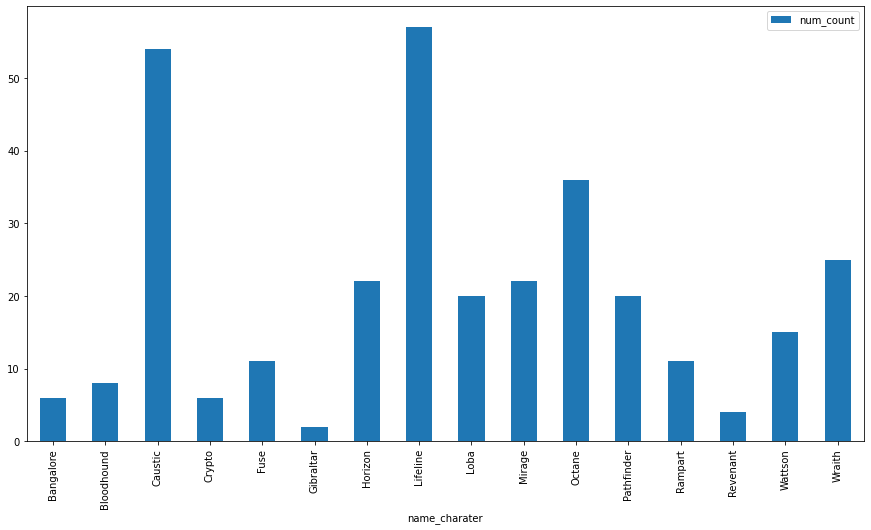

In [ ]:
result_reddit.plot.bar(x = 'name_charater',y='num_count')
plt.gcf().set_size_inches(15, 8)
plt.show()

[]

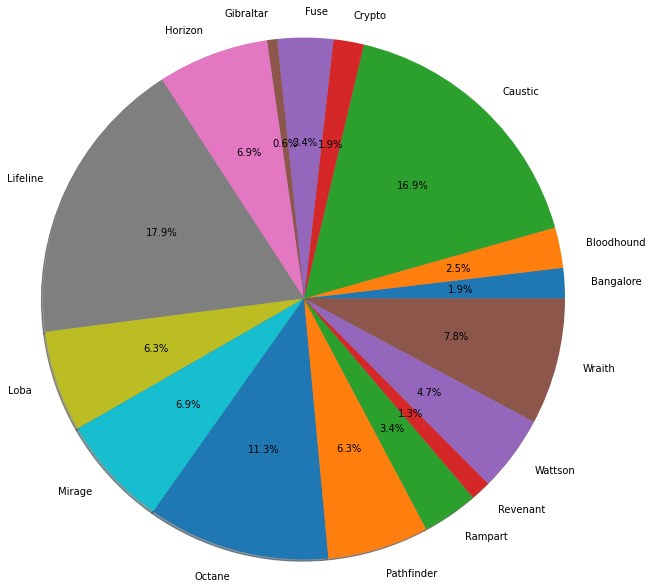

In [ ]:
plt.pie(list(result_reddit['num_count']),labels=result_reddit['name_charater'],shadow=True,radius=3,autopct='%1.1f%%')
plt.plot()

In [ ]:
num_row_search = result_reddit['num_count'].sum()
num_row_search

319

[]

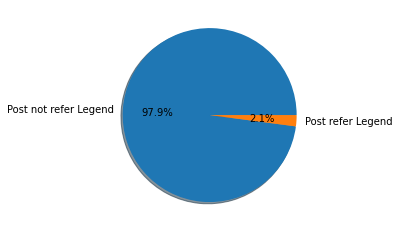

In [ ]:
#เทียบข้อมูลที่มีการกล่าวถึง Legend กับไม่กล่าวถึง
plt.pie([len(Data_Frame_reddit)-num_row_search,num_row_search],labels=['Post not refer Legend','Post refer Legend'],shadow=True,autopct='%1.1f%%')
plt.plot()

# twitter

In [ ]:
Data_Frame_twitter = pd.read_excel('Twitter_clean.xlsx')
drop_column = Data_Frame_twitter.columns[0]
Data_Frame_twitter.drop(columns=drop_column,inplace=True)
Data_Frame_twitter

,id,text,source
0,1381790685557367040,It's no more MIND GAMES for @RandyOrton!\n\nIt...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
1,1381556729880583936,i swear y’all always complaining about a gun i...,"<a href=""http://twitter.com/download/iphone"" r..."
2,1381801062747808000,The Viper\nThe Apex Predator\nThe Legend Kille...,"<a href=""http://grabyo.com"" rel=""nofollow"">Gra..."
3,1382068515042065920,RT @RECXNCY: It’s #PortfolioDay ! \n\nThought ...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,1382068512307387904,起きてるかつapexできる朝活猛者いませんか@2,"<a href=""http://twitter.com/download/iphone"" r..."
...,...,...,...
39328,1381711638714315008,RT @PlayApex: Let's go for a ride. 😏😏\n\n🎬: u/...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
39329,1381711628589228032,@ENXSwatbaker @PlayApex Oh i know.\n\nStill am...,"<a href=""http://twitter.com/download/android"" ..."
39330,1381711625103666944,@PlayApex https://t.co/Our2uevd8t,"<a href=""https://about.twitter.com/products/tw..."
39331,1381711615649743104,@PlayApex @EAPlay I beat this game &amp; got a...,"<a href=""http://twitter.com/download/iphone"" r..."


In [ ]:
Data_Frame_twitter.duplicated().sum()

0

In [ ]:
Data_Frame = Data_Frame_twitter
count_list = []
for charater in list(list_charater.keys()):
  tmp_dict = {}
  tmp_count = 0
  for text_search in list_charater[charater]:
    check_text = Data_Frame[Data_Frame['text'].str.match(r'({})'.format(text_search)) == True]
    tmp_count += len(check_text)
  
  tmp_dict['name_charater'] = charater
  tmp_dict['num_count'] = tmp_count
  count_list.append(tmp_dict)

count_list

[{'name_charater': 'Bangalore', 'num_count': 1},
 {'name_charater': 'Bloodhound', 'num_count': 3},
 {'name_charater': 'Caustic', 'num_count': 5},
 {'name_charater': 'Crypto', 'num_count': 2},
 {'name_charater': 'Fuse', 'num_count': 3},
 {'name_charater': 'Gibraltar', 'num_count': 2},
 {'name_charater': 'Horizon', 'num_count': 0},
 {'name_charater': 'Lifeline', 'num_count': 2},
 {'name_charater': 'Loba', 'num_count': 1},
 {'name_charater': 'Mirage', 'num_count': 1},
 {'name_charater': 'Octane', 'num_count': 4},
 {'name_charater': 'Pathfinder', 'num_count': 1},
 {'name_charater': 'Rampart', 'num_count': 1},
 {'name_charater': 'Revenant', 'num_count': 0},
 {'name_charater': 'Wattson', 'num_count': 7},
 {'name_charater': 'Wraith', 'num_count': 2}]

In [ ]:
plot_twitter = pd.DataFrame(count_list)

In [ ]:
plot_twitter

,name_charater,num_count
0,Bangalore,1
1,Bloodhound,3
2,Caustic,5
3,Crypto,2
4,Fuse,3
5,Gibraltar,2
6,Horizon,0
7,Lifeline,2
8,Loba,1
9,Mirage,1


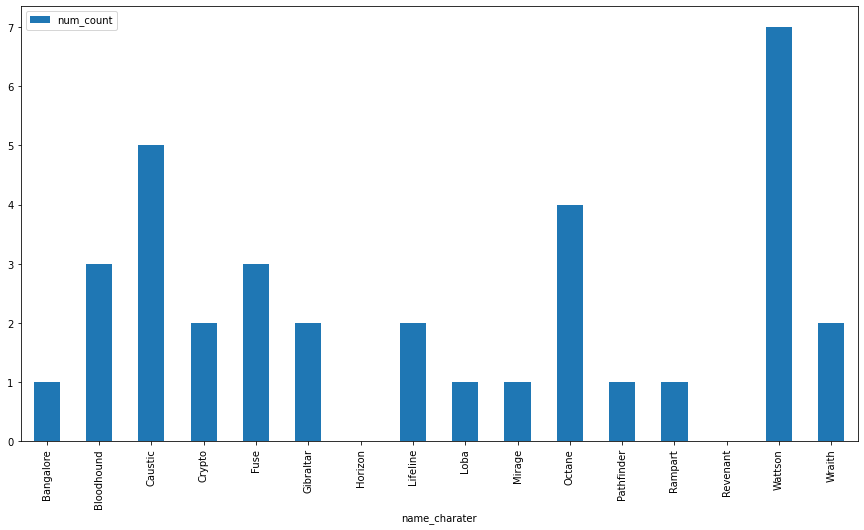

In [ ]:
plot_twitter.plot.bar(x = 'name_charater',y='num_count')
plt.gcf().set_size_inches(15, 8)
plt.show()

[]

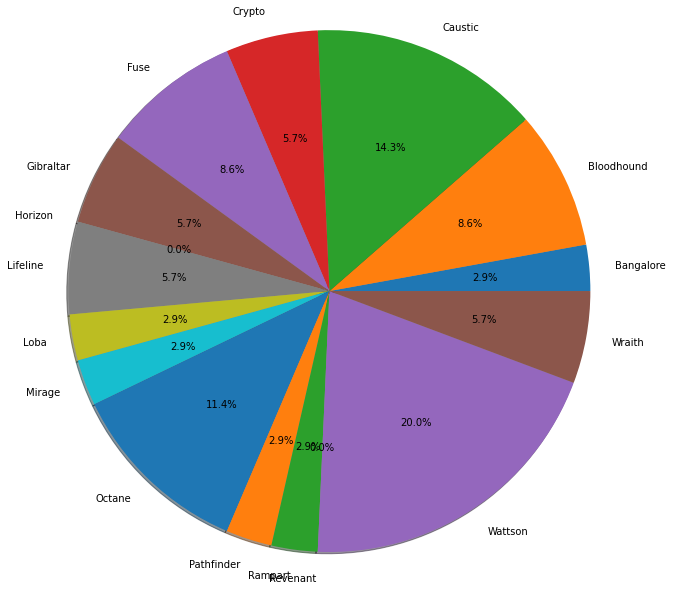

In [ ]:
plt.pie(list(plot_twitter['num_count']),labels=plot_twitter['name_charater'],shadow=True,radius=3,autopct='%1.1f%%')
plt.plot()

In [ ]:
num_row_search = plot_twitter['num_count'].sum()
num_row_search

35

[]

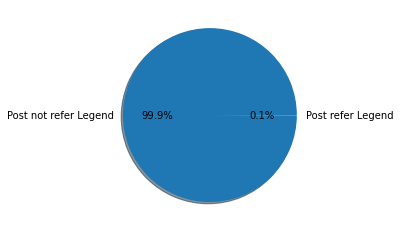

In [ ]:
#เทียบข้อมูลที่มีการกล่าวถึง Legend กับไม่กล่าวถึง
plt.pie([len(Data_Frame_twitter)-num_row_search,num_row_search],labels=['Post not refer Legend','Post refer Legend'],shadow=True,autopct='%1.1f%%')
plt.plot()

# Result

In [ ]:
ans = pd.DataFrame()

In [ ]:
name = result_reddit['name_charater']
count = result_reddit['num_count'] + plot_twitter['num_count']
ans['name_charater'] = name
ans['num_count'] = count
ans

,name_charater,num_count
0,Bangalore,7
1,Bloodhound,11
2,Caustic,59
3,Crypto,8
4,Fuse,14
5,Gibraltar,4
6,Horizon,22
7,Lifeline,59
8,Loba,21
9,Mirage,23


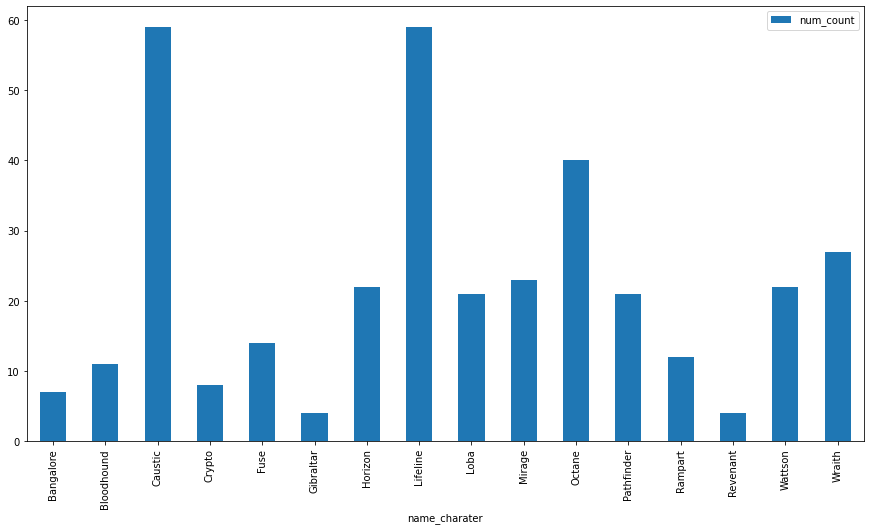

In [ ]:
ans.plot.bar(x = 'name_charater',y='num_count')
plt.gcf().set_size_inches(15, 8)
plt.show()

[]

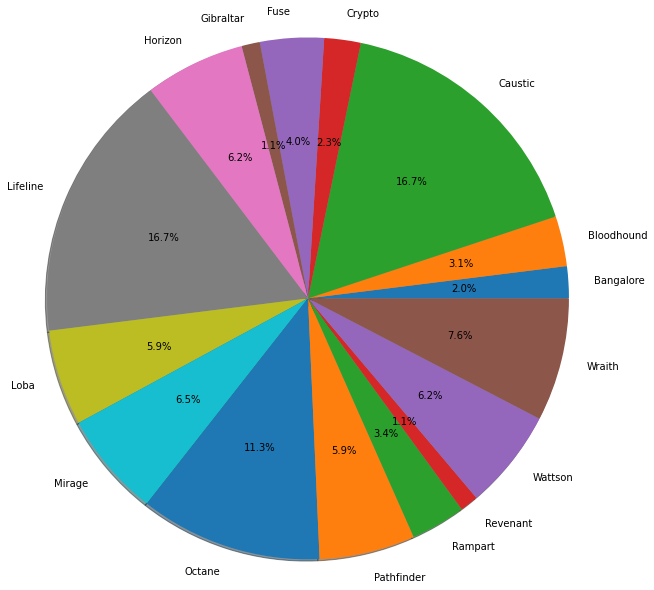

In [ ]:
plt.pie(list(ans['num_count']),labels=ans['name_charater'],shadow=True,radius=3,autopct='%1.1f%%')
plt.plot()